In [1]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

**problem**: people who live at king country confuse about figure it out a value of a house, some people think that a value of a house based on the size property and the location.
**Goals**: we will figure it out what aspect thats affecting house price. we will doing some explore and analytics

- Definisikan Masalah terkait bisnis yang ingin anda selesaikan (Define Business Problem)
- Definisikan Tujuan EDA anda (Define Goals)
- Analisa Deskriptif & Handling Missing Value serta Outliers
- Analisis Data (Univariate dan Multivariate, Gunakan Crosstab atau Pivot_Table atau Group by )
- Visualisasi Data (Univariate dan Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya) 
- Temukan Insight data berdasarkan Analisis dan Visualisasi yang telah anda lakukan 
- Kesimpulan dan Saran yang dapat anda berikan berdasarkan hasil EDA anda

In [45]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
df['date'] = df['date'].astype('datetime64')

In [47]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# decribe data

- we can see a point of view from the data, for example there is a house without both , bedrooms and bathrooms
- the provided table shows data about mean,min, std, etc. let take a look to maximum price in this dataset, 7.7 million is the maximum of the price, it mean its pretty far from mean and median

In [50]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
houseDesc=[]
for i in df.columns:
    houseDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].value_counts()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [52]:
pd.DataFrame(data=houseDesc,columns=[
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'unique',
    'unique sample'
])

,Data Feature,Data Types,Null,Null Pct,unique,unique sample
0,id,int64,0,795000620 0.01 2206700215 0.01 64330004...,21436,"[1085623710, 1982201595]"
1,date,object,0,20140623T000000 0.66 20140626T000000 0.6...,372,"[20150211T000000, 20140506T000000]"
2,price,float64,0,450000.0 0.80 350000.0 0.80 550000.0 ...,4028,"[242050.0, 479500.0]"
3,bedrooms,int64,0,3 45.45 4 31.84 2 12.77 5 7.4...,13,"[9, 8]"
4,bathrooms,float64,0,2.50 24.89 1.00 17.82 1.75 14.10 2.25...,30,"[3.0, 7.75]"
5,sqft_living,int64,0,1300 0.64 1400 0.62 1440 0.62 1010 ...,1038,"[982, 2481]"
6,sqft_lot,int64,0,5000 1.66 6000 1.34 4000 1.16 7200...,9782,"[14984, 13912]"
7,floors,float64,0,1.0 49.41 2.0 38.13 1.5 8.84 3.0 ...,6,"[2.5, 3.0]"
8,waterfront,int64,0,"0 99.25 1 0.75 Name: waterfront, dtype:...",2,"[0, 1]"
9,view,int64,0,0 90.17 2 4.46 3 2.36 1 1.54 4 ...,5,"[0, 1]"


# Analisis Data

In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
pd.crosstab(index = df["zipcode"], columns = ['Average_Price'], values = df['price'], aggfunc = 'mean').sort_values('Average_Price' ,ascending = False).tail(5)

col_0,Average_Price
zipcode,
98148,284908.596491
98001,280804.690608
98032,251296.240000
98168,240328.371747
98002,234284.035176


- lets figure it out about average place in some area, the data above show us that the three highest average price are in 908039,98004,98040

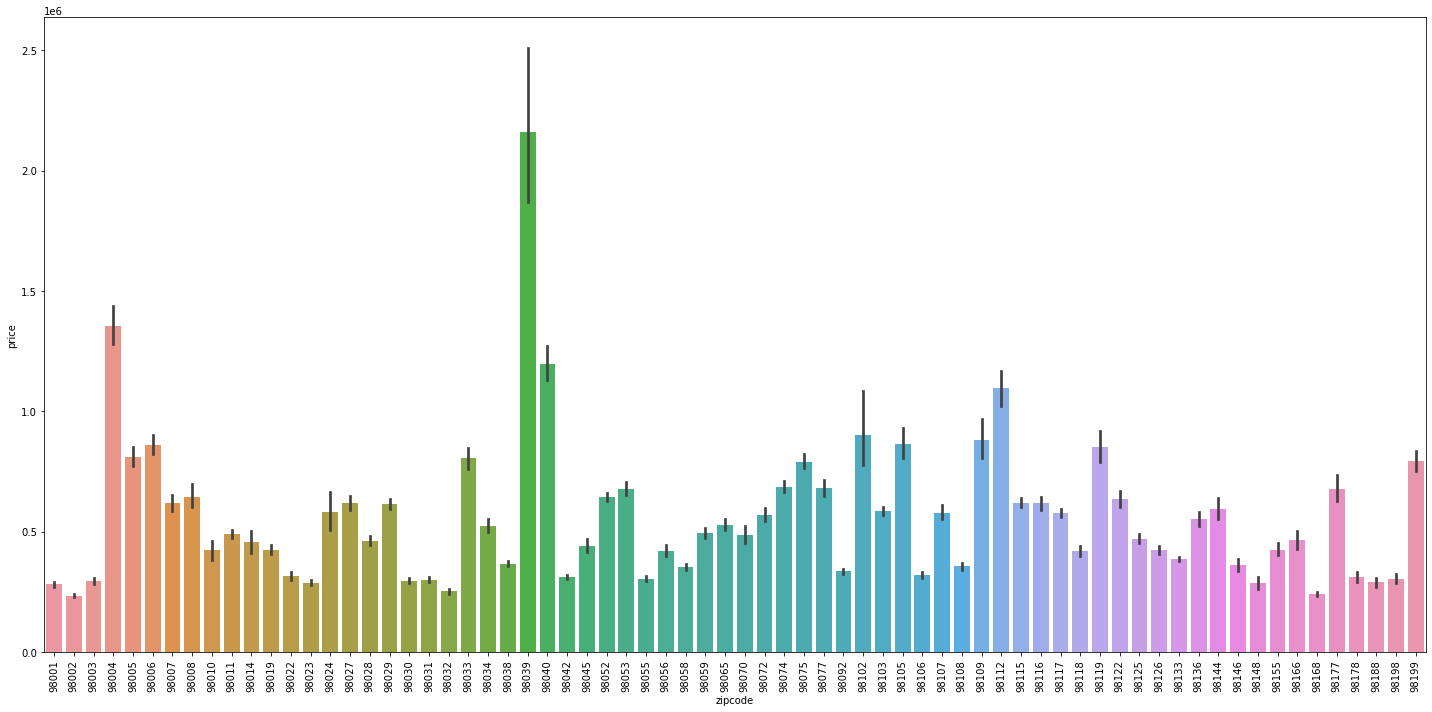

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='zipcode',y='price',data=df)
plt.xticks(rotation = 90)
plt.tight_layout()

In [56]:
bin_quality =[1,5,10,13]
label = ['Low', 'Average', 'High']

df['Quality'] = pd.cut(df['grade'], bins = bin_quality, labels = label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Average


In [57]:
# binning the age of the building columns

In [65]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Quality          1
dtype: int64

In [67]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [69]:
df['age'] = df['date'].dt.year - df['yr_built']

In [70]:
# binning the age of the building column
bin_age = [0,5,10,25,50,75,100,100000]
labels = ['1-5','6-10','11-25','26-50','51-75','76-100','>100']

df['age_group'] = pd.cut(df['age'], bins = bin_age, labels = labels)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50


In [71]:
bin_quality =[1,5,10,13]
label = ['Low', 'Average', 'High']

df['Quality'] = pd.cut(df['grade'], bins = bin_quality, labels = label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Quality,age,age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Average,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Average,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Average,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Average,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Average,28,26-50


In [73]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.021217
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.053951
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.154324
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.506407
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.318488
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.052990
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.489640
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.026093
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.053458
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.360665


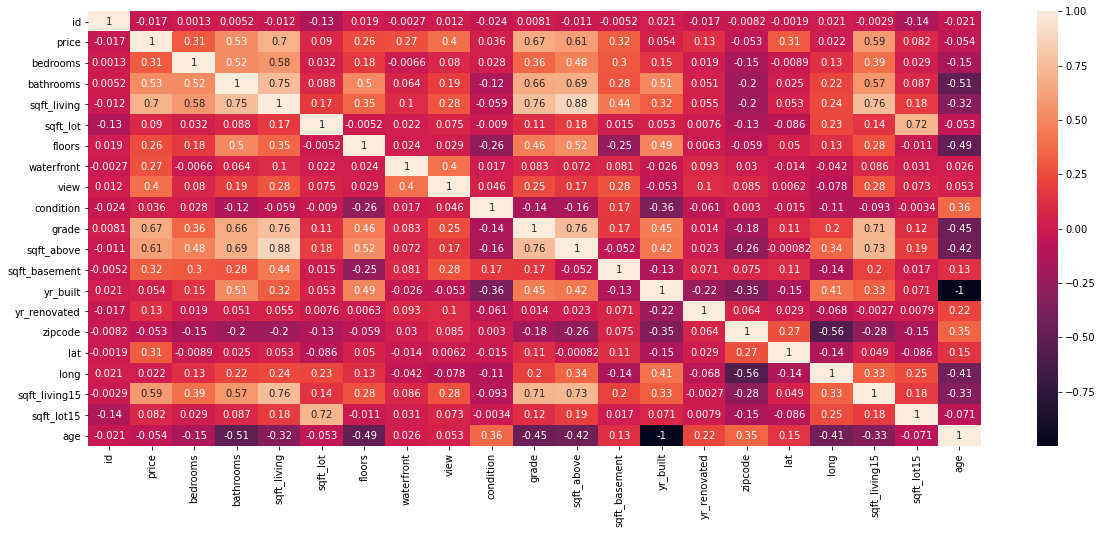

In [77]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

# price group

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


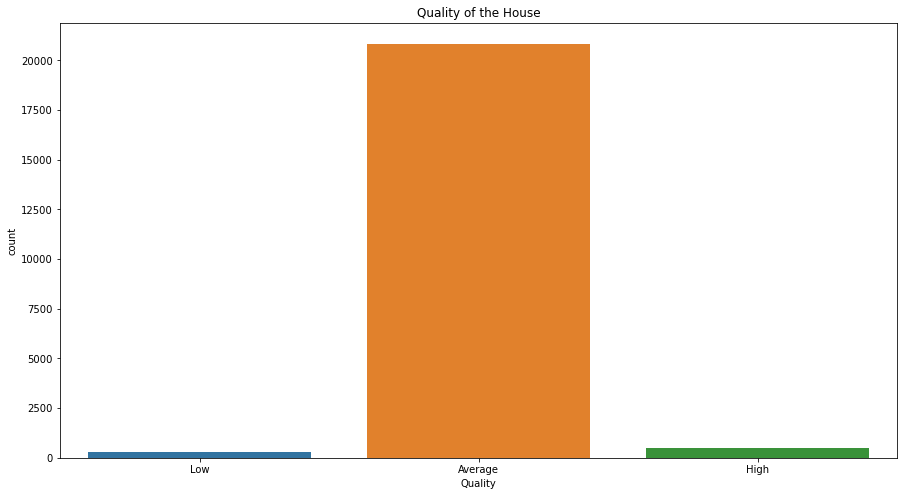

In [89]:
plt.figure(figsize=(15,8))
sns.countplot(df['Quality'])
plt.title('Quality of the House')

plt.show()

# bedrooms and price

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


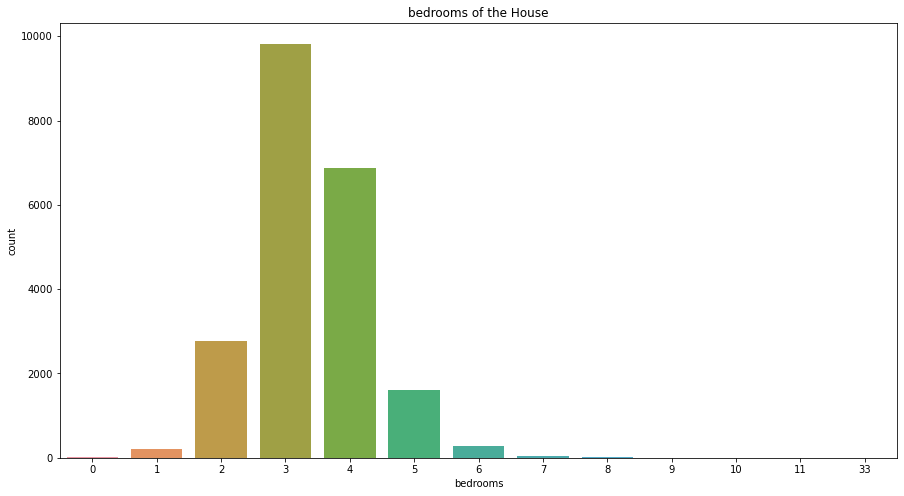

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(df['bedrooms'])
plt.title('bedrooms of the House')

plt.show()

## visualisation correlation with some features

### visualisation correlation price with view

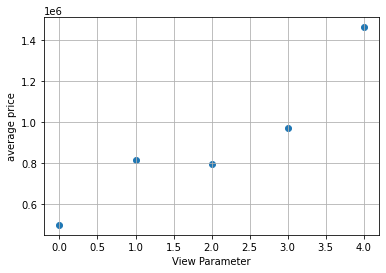

In [82]:
plt.scatter(sorted(list(df["view"].unique())),
           [df[df["view"] == x]["price"].mean() for x in sorted(list(df["view"].unique()))])
plt.grid(True)
plt.xlabel("View Parameter")
plt.ylabel("average price")

plt.show()

- the better the view, the more expensive it is and vice versa. eventthough they have a little score correlation between them

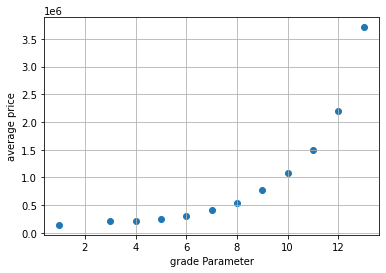

In [85]:
plt.scatter(sorted(list(df['grade'].unique())),
           [df[df['grade']==x]['price'].mean() for x in sorted(list(df["grade"].unique()))])
plt.grid(True)
plt.xlabel("grade Parameter")
plt.ylabel("average price")

plt.show()

- grade parameter has a big impact of the house price, because they have a big score of the correlation and the better grade , the more expensice it is.

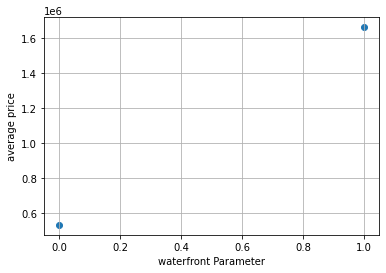

In [92]:
plt.scatter(sorted(list(df['waterfront'].unique())),
           [df[df['waterfront']==x]['price'].mean() for x in sorted(list(df["waterfront"].unique()))])
plt.grid(True)
plt.xlabel("waterfront Parameter")
plt.ylabel("average price")

plt.show()

# outliers

## drop the coloumn
- just drop the coloumn of id and date

In [11]:
df.drop(['id','date'],axis=1,inplace=True)

- checking outliers and get the insight

## turn price to thousand

In [20]:
df["price"] = df["price"].apply(lambda x : round((x / 1000), 2))

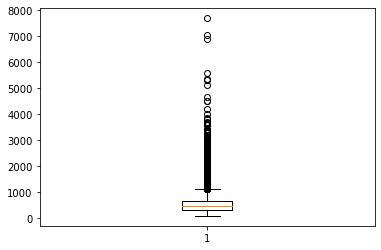

In [22]:
plt.boxplot(df['price'])
plt.show()

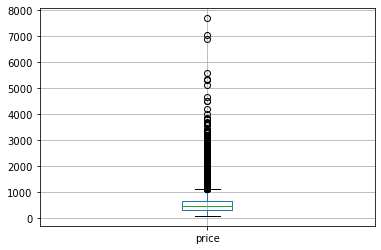

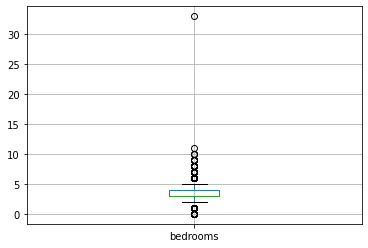

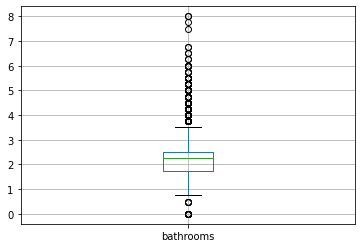

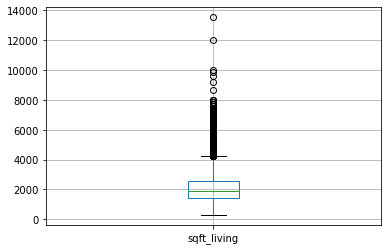

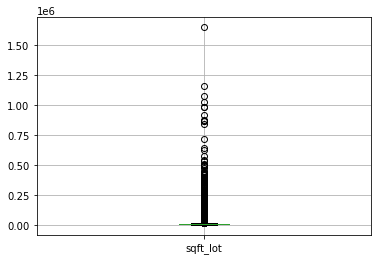

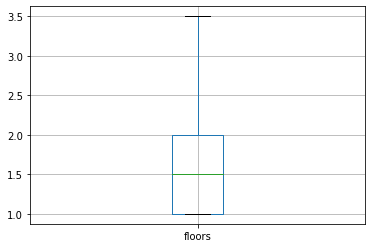

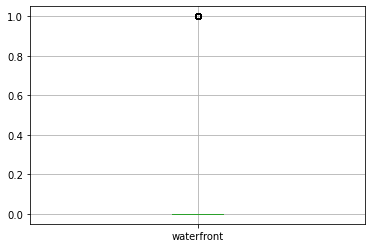

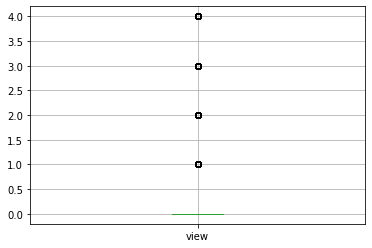

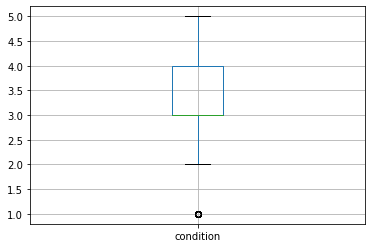

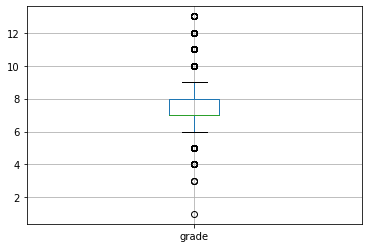

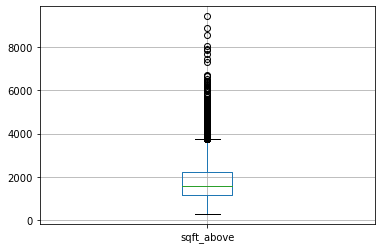

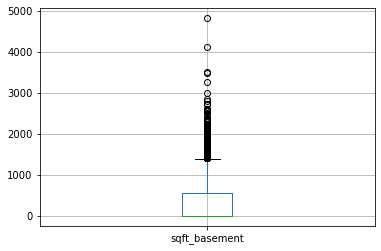

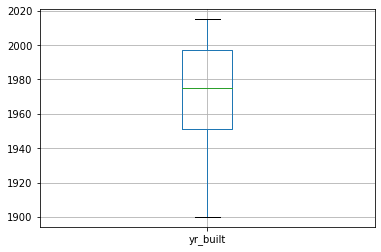

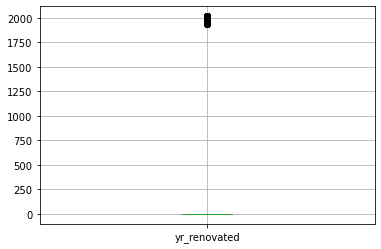

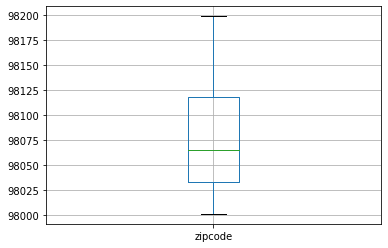

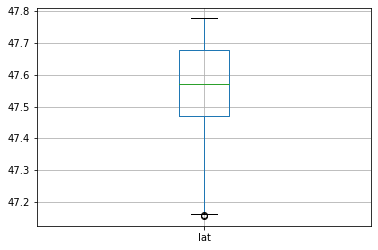

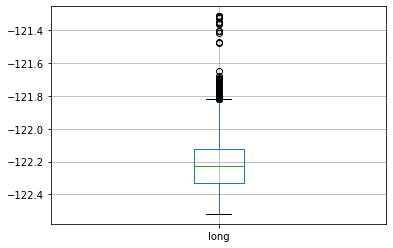

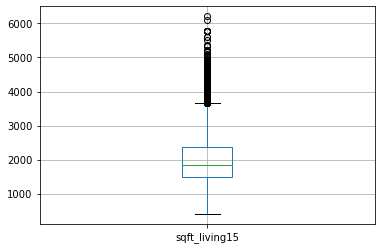

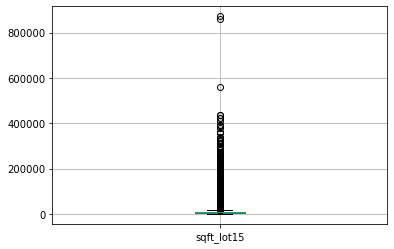

In [25]:
for column in df:
    plt.figure()
    df.boxplot([column])
plt.show()

- it is common thing if we see the outliers on the selling house

# check distribution price

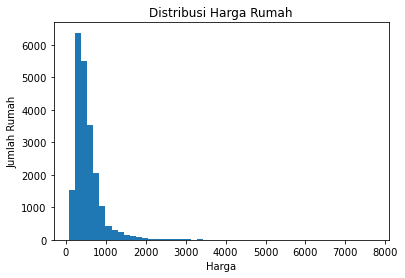

In [29]:
plt.hist(df["price"],bins=50)
plt.title("Distribusi Harga Rumah")
plt.ylabel("Jumlah Rumah")
plt.xlabel("Harga")
plt.show()

- if we se the diagram above, we can say that people who lives at that area not realy interested on the houses prices above 1000

# Conclusion

- most houses are at the average level
- there are a big gap between an area 98102 and ranked above it
- most highest average price in kingtown city is 98039
- the lowest average price in kingtown city is 98148
- house that has 3 bedrooms is the most frequent in king city
- view has the big impact of the correlation because they have an big score correlation and the higher the correlation, the higher the house price
- grade has the big impact of the correlation because they have an big score correlation and the higher the correlation, the higher the house price

# Recommendation
- if you want to sell your house and want it to sell quickly, sell it around 1000 dollar, do not sell above 1000
- if your house located near waterfront, just sell it at high price above 1.600
- increase your house bedrooms until it have 3 or above bedrooms, because you can sell it quickly

In [93]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Quality          1
age              0
age_group        0
dtype: int64